## WeatherPy
----

### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
#!pip install citipy

%matplotlib inline

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

In [6]:
#print(cities)

In [7]:
#replace space with + sign for url prep
cities = [city.replace(' ', '+') for city in cities]
#cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Build query URL and request your results in Celsius
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#actual
#query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

#full form of actual
#query_url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}q={city}&units={units}"

#test url
#query_url_test = f"{url}appid={weather_api_key}&q={cities[23]}&units={units}"
#print(query_url_test)
# Get weather data (test)
#city_response = requests.get(query_url_test)
#city_json = city_response.json()

In [7]:
#test json dumps
#print(json.dumps(city_json, indent=4))

In [8]:
#testing where needed data is in the json file
# print(city_json["coord"])
# print(city_json["coord"]["lon"])
# print(city_json["coord"]["lat"])
# print(city_json["main"]["temp_max"])
# print(city_json["main"]["humidity"])
# print(city_json["clouds"]["all"])
# print(city_json["wind"]["speed"])
# print(city_json["sys"]["country"])
# print(city_json["dt"])
# print(city_json["name"])

In [11]:
count = 1
groupcount = 1
#remaking cities list in case a city can't be found in api
city_name = []
lon = []
lat = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
linebreak = "---------------------------------------------------------------------------"

print("Beginning Data Retrieval")
print(linebreak)

for city in cities:
    
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
#    print(query_url)
    
    try:
        city_response = requests.get(query_url)
        city_json = city_response.json()
        city_name.append(city_json["name"])
        lon.append(city_json["coord"]["lon"])
        lat.append(city_json["coord"]["lat"])
        max_temp.append(city_json["main"]["temp_max"])
        humidity.append(city_json["main"]["humidity"])
        cloudiness.append(city_json["clouds"]["all"])
        wind_speed.append(city_json["wind"]["speed"])
        country.append(city_json["sys"]["country"])
        date.append(city_json["dt"])
        
        print(f"Processing Record {count} of Set {groupcount} | {city}")
        count += 1
        
    except:
        print("City not found. Skipping ...")
        pass
        
    if count > 50:
            groupcount += 1
            count = 1
            
print(linebreak)
print("Data Retrieval Complete")
print(linebreak)


Beginning Data Retrieval
---------------------------------------------------------------------------
Processing Record 1 of Set 1 | okulovka
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | aykhal
Processing Record 5 of Set 1 | east+london
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | mount+gambier
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | coihaique
Processing Record 10 of Set 1 | flinders
City not found. Skipping ...
Processing Record 11 of Set 1 | cabatuan
Processing Record 12 of Set 1 | torbay
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | mehamn
Processing Record 15 of Set 1 | ribeira+grande
Processing Record 16 of Set 1 | samarai
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | nelson
Processing Record 19 of Set 1 | hami
Processing Record 20 of Set 1 | cape+town
Processing Record 21 of Set 1 | mataura
Processing Record 22 

Processing Record 35 of Set 4 | panaba
City not found. Skipping ...
Processing Record 36 of Set 4 | burla
Processing Record 37 of Set 4 | mahebourg
Processing Record 38 of Set 4 | porto+nacional
City not found. Skipping ...
Processing Record 39 of Set 4 | codrington
Processing Record 40 of Set 4 | lethem
Processing Record 41 of Set 4 | kavaratti
Processing Record 42 of Set 4 | tautira
Processing Record 43 of Set 4 | saint+anthony
Processing Record 44 of Set 4 | bongaree
Processing Record 45 of Set 4 | sterling
Processing Record 46 of Set 4 | zeya
Processing Record 47 of Set 4 | tiksi
Processing Record 48 of Set 4 | santo+tomas
Processing Record 49 of Set 4 | kabinda
Processing Record 50 of Set 4 | klaksvik
Processing Record 1 of Set 5 | ambilobe
Processing Record 2 of Set 5 | chuy
City not found. Skipping ...
City not found. Skipping ...
Processing Record 3 of Set 5 | mackay
Processing Record 4 of Set 5 | honningsvag
Processing Record 5 of Set 5 | galesong
Processing Record 6 of Set 5 

Processing Record 22 of Set 8 | roma
Processing Record 23 of Set 8 | bilibino
Processing Record 24 of Set 8 | horsham
Processing Record 25 of Set 8 | tessalit
Processing Record 26 of Set 8 | chadiza
Processing Record 27 of Set 8 | puerto+madero
Processing Record 28 of Set 8 | ceska+ves
Processing Record 29 of Set 8 | grao+mogol
Processing Record 30 of Set 8 | praya
Processing Record 31 of Set 8 | sompeta
Processing Record 32 of Set 8 | magway
Processing Record 33 of Set 8 | north+bend
Processing Record 34 of Set 8 | aguimes
City not found. Skipping ...
Processing Record 35 of Set 8 | puerto+escondido
Processing Record 36 of Set 8 | el+jicaro
Processing Record 37 of Set 8 | gasa
Processing Record 38 of Set 8 | karratha
Processing Record 39 of Set 8 | glenwood+springs
Processing Record 40 of Set 8 | caucaia
Processing Record 41 of Set 8 | cabedelo
Processing Record 42 of Set 8 | coahuayana
Processing Record 43 of Set 8 | qasigiannguit
Processing Record 44 of Set 8 | chepareria
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
dict = {"City": city_name, "Latitude": lat, "Longitude": lon, "Max Temp (F)": max_temp, "Humidity": humidity, 
       "Cloudiness": cloudiness, "Wind Speed": wind_speed, "Country": country, "Date": date}
cities_df = pd.DataFrame(dict)
cities_df

,City,Latitude,Longitute,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Okulovka,58.4008,33.2908,48.47,52,34,7.72,RU,1618677928
1,Rikitea,-23.1203,-134.9692,76.86,69,95,8.93,PF,1618677806
2,Nikolskoye,59.7035,30.7861,53.60,26,0,13.42,RU,1618677928
3,Aykhal,66.0000,111.5000,8.49,93,100,20.87,RU,1618677929
4,East London,-33.0153,27.9116,66.20,72,0,11.50,ZA,1618677757
...,...,...,...,...,...,...,...,...,...
539,Korhogo,9.4500,-5.6333,83.52,49,100,3.58,CI,1618678086
540,Abu Kamal,34.4506,40.9171,85.10,15,4,5.79,SY,1618678086
541,Nīlēshwar,12.2500,75.1000,83.43,80,32,7.58,IN,1618678086
542,Alto Araguaia,-17.3147,-53.2153,85.17,46,1,4.92,BR,1618678087


In [13]:
cities_df.to_csv(output_data_file, sep=",", encoding='utf-8',index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#cities_df["Humidity"] == 70

In [ ]:
#test = cities_df[(cities_df["Humidity"] > 80)].index
#test_df = cities_df.drop(test)

In [65]:
#test_df = test_df.reset_index()

In [68]:
#test_df = test_df.set_index("City")

In [69]:
#test_df["Humidity"].plot(kind="bar")
#plt.savefig("Images/test.png")

In [14]:
#Using .loc to build a new dataframe with cities only
supersaturation_df = cities_df.loc[(cities_df["Humidity"] > 100)]
supersaturation_df.count()
#If .count shows 0, no cities in dataframe have humidity values over 100

City            0
Latitude        0
Longitute       0
Max Temp (F)    0
Humidity        0
Cloudiness      0
Wind Speed      0
Country         0
Date            0
dtype: int64

In [71]:
supersaturation_df.head()

,City,Latitude,Longitute,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date


In [72]:
#  Get the indices of cities that have humidity over 100%.
indices = supersaturation_df.index

In [73]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [30]:
cities_df = pd.read_csv(output_data_file)
cities_df

,City,Latitude,Longitude,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Okulovka,58.4008,33.2908,48.47,52,34,7.72,RU,1618677928
1,Rikitea,-23.1203,-134.9692,76.86,69,95,8.93,PF,1618677806
2,Nikolskoye,59.7035,30.7861,53.60,26,0,13.42,RU,1618677928
3,Aykhal,66.0000,111.5000,8.49,93,100,20.87,RU,1618677929
4,East London,-33.0153,27.9116,66.20,72,0,11.50,ZA,1618677757
...,...,...,...,...,...,...,...,...,...
539,Korhogo,9.4500,-5.6333,83.52,49,100,3.58,CI,1618678086
540,Abu Kamal,34.4506,40.9171,85.10,15,4,5.79,SY,1618678086
541,Nīlēshwar,12.2500,75.1000,83.43,80,32,7.58,IN,1618678086
542,Alto Araguaia,-17.3147,-53.2153,85.17,46,1,4.92,BR,1618678087


In [29]:
cities_df.describe()

,Latitude,Longitude,Max Temp (F),Humidity,Cloudiness,Wind Speed,Date
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,18.980085,18.405115,61.290643,67.738971,56.075368,7.744540,1.618678e+09
std,33.305067,90.752254,23.248621,21.969548,36.974679,5.203495,7.641003e+01
min,-54.800000,-175.200000,-21.100000,3.000000,0.000000,0.400000,1.618677e+09
25%,-8.234400,-58.627400,48.200000,54.000000,20.000000,4.000000,1.618678e+09
50%,20.608450,25.624050,66.815000,72.000000,69.500000,6.690000,1.618678e+09
75%,49.608350,99.826900,80.010000,85.000000,90.000000,10.240000,1.618678e+09
max,78.218600,179.316700,103.600000,100.000000,100.000000,36.240000,1.618678e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

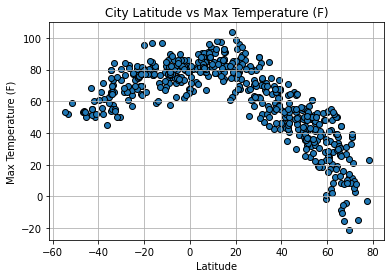

In [6]:
plt.scatter(cities_df["Latitude"], cities_df["Max Temp (F)"], edgecolor="black")
plt.grid()
plt.title("City Latitude vs Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Images/lat-vs-temp.png")
plt.show()

## Latitude vs. Humidity Plot

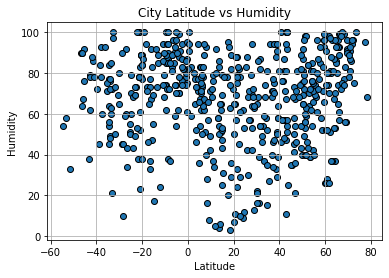

In [7]:
plt.scatter(cities_df["Latitude"], cities_df["Humidity"], edgecolor="black")
plt.grid()
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Images/lat-vs-humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

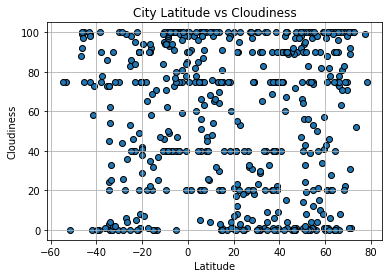

In [8]:
plt.scatter(cities_df["Latitude"], cities_df["Cloudiness"], edgecolor="black")
plt.grid()
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Images/lat-vs-cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

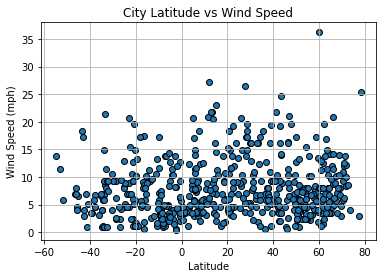

In [9]:
plt.scatter(cities_df["Latitude"], cities_df["Wind Speed"], edgecolor="black")
plt.grid()
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Images/lat-vs-windspeed.png")
plt.show()

## Linear Regression

In [10]:
#Separate data into Northern and Southern Hemispheres
n_hemi = cities_df[cities_df["Latitude"] >= 0]
s_hemi = cities_df[cities_df["Latitude"] <= 0]

s_hemi.head()

,City,Latitude,Longitute,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
1,Rikitea,-23.1203,-134.9692,76.86,69,95,8.93,PF,1618677806
4,East London,-33.0153,27.9116,66.20,72,0,11.50,ZA,1618677757
5,Bluff,-46.6000,168.3333,53.01,90,88,7.00,NZ,1618677929
6,Mount Gambier,-37.8333,140.7667,51.80,93,90,4.61,AU,1618677930
7,Atuona,-9.8000,-139.0333,80.40,74,77,17.20,PF,1618677930


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

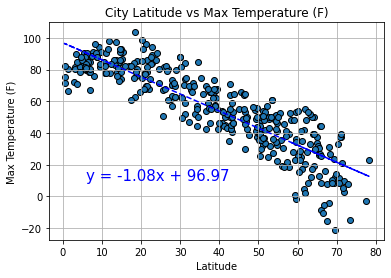

In [11]:
nx = n_hemi["Latitude"]
nmty = n_hemi["Max Temp (F)"]
(nmt_slope, nmt_intercept, nmt_rvalue, nmt_pvalue, nmt_stderr) = linregress(nx, nmty)
nmt_regress_values = nx * nmt_slope + nmt_intercept
line_eq = "y = " + str(round(nmt_slope,2)) + "x + " + str(round(nmt_intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.plot(nx, nmt_regress_values,"b--")
plt.scatter(n_hemi["Latitude"], n_hemi["Max Temp (F)"], edgecolor="black")
plt.grid()
plt.title("City Latitude vs Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Images/northern-hemisphere-lat-vs-temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

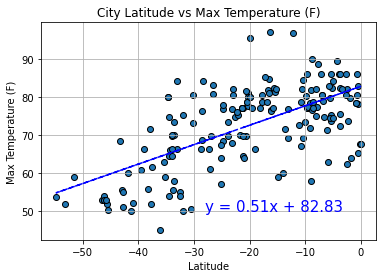

In [12]:
sx = s_hemi["Latitude"]
smty = s_hemi["Max Temp (F)"]
(smt_slope, smt_intercept, smt_rvalue, smt_pvalue, smt_stderr) = linregress(sx, smty)
smt_regress_values = sx * smt_slope + smt_intercept
line_eq = "y = " + str(round(smt_slope,2)) + "x + " + str(round(smt_intercept,2))
plt.annotate(line_eq,(-28,50),fontsize=15,color="blue")
plt.plot(sx, smt_regress_values,"b--")
plt.scatter(s_hemi["Latitude"], s_hemi["Max Temp (F)"], edgecolor="black")
plt.grid()
plt.title("City Latitude vs Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Images/southern-hemisphere-lat-vs-temp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

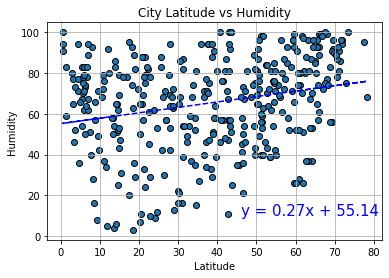

In [13]:
nhy = n_hemi["Humidity"]
(nh_slope, nh_intercept, nh_rvalue, nh_pvalue, nh_stderr) = linregress(nx, nhy)
nh_regress_values = nx * nh_slope + nh_intercept
line_eq = "y = " + str(round(nh_slope,2)) + "x + " + str(round(nh_intercept,2))
plt.annotate(line_eq,(46,10),fontsize=15,color="blue")
plt.plot(nx, nh_regress_values,"b--")
plt.scatter(n_hemi["Latitude"], n_hemi["Humidity"], edgecolor="black")
plt.grid()
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Images/northern-hemisphere-lat-vs-humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

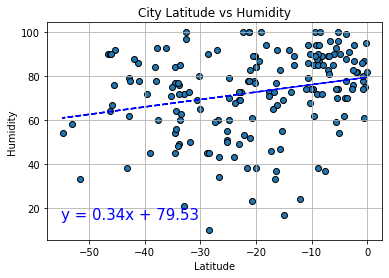

In [14]:
shy = s_hemi["Humidity"]
(sh_slope, sh_intercept, sh_rvalue, sh_pvalue, sh_stderr) = linregress(sx, shy)
sh_regress_values = sx * sh_slope + sh_intercept
line_eq = "y = " + str(round(sh_slope,2)) + "x + " + str(round(sh_intercept,2))
plt.annotate(line_eq,(-55,15),fontsize=15,color="blue")
plt.plot(sx, sh_regress_values,"b--")
plt.scatter(s_hemi["Latitude"], s_hemi["Humidity"], edgecolor="black")
plt.grid()
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Images/southern-hemisphere-lat-vs-humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

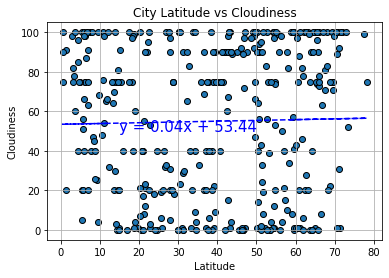

In [15]:
ncy = n_hemi["Cloudiness"]
(nc_slope, nc_intercept, nc_rvalue, nc_pvalue, nc_stderr) = linregress(nx, ncy)
nc_regress_values = nx * nc_slope + nc_intercept
line_eq = "y = " + str(round(nc_slope,2)) + "x + " + str(round(nc_intercept,2))
plt.annotate(line_eq,(15,50),fontsize=15,color="blue")
plt.plot(nx, nc_regress_values,"b--")
plt.scatter(n_hemi["Latitude"], n_hemi["Cloudiness"], edgecolor="black")
plt.grid()
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Images/northern-hemisphere-lat-vs-cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

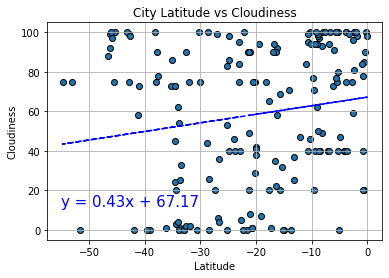

In [16]:
scy = s_hemi["Cloudiness"]
(sc_slope, sc_intercept, sc_rvalue, sc_pvalue, sc_stderr) = linregress(sx, scy)
sc_regress_values = sx * sc_slope + sc_intercept
line_eq = "y = " + str(round(sc_slope,2)) + "x + " + str(round(sc_intercept,2))
plt.annotate(line_eq,(-55,12),fontsize=15,color="blue")
plt.plot(sx, sc_regress_values,"b--")
plt.scatter(s_hemi["Latitude"], s_hemi["Cloudiness"], edgecolor="black")
plt.grid()
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Images/southern-hemisphere-lat-vs-cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

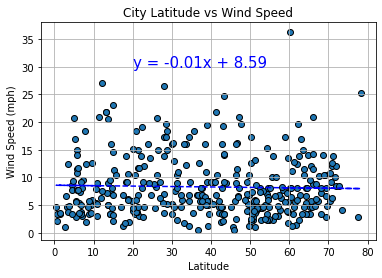

In [17]:
nwsy = n_hemi["Wind Speed"]
(nws_slope, nws_intercept, nws_rvalue, nws_pvalue, nws_stderr) = linregress(nx, nwsy)
nws_regress_values = nx * nws_slope + nws_intercept
line_eq = "y = " + str(round(nws_slope,2)) + "x + " + str(round(nws_intercept,2))
plt.annotate(line_eq,(20,30),fontsize=15,color="blue")
plt.plot(nx, nws_regress_values,"b--")
plt.scatter(n_hemi["Latitude"], n_hemi["Wind Speed"], edgecolor="black")
plt.grid()
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Images/northern-hemisphere-lat-vs-windspeed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

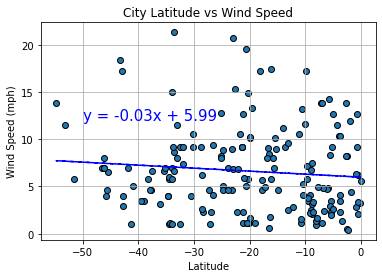

In [18]:
swsy = s_hemi["Wind Speed"]
(sws_slope, sws_intercept, sws_rvalue, sws_pvalue, sws_stderr) = linregress(sx, swsy)
sws_regress_values = sx * sws_slope + sws_intercept
line_eq = "y = " + str(round(sws_slope,2)) + "x + " + str(round(sws_intercept,2))
plt.annotate(line_eq,(-50,12),fontsize=15,color="blue")
plt.plot(sx, sws_regress_values,"b--")
plt.scatter(s_hemi["Latitude"], s_hemi["Wind Speed"], edgecolor="black")
plt.grid()
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Images/southern-hemisphere-lat-vs-windspeed.png")
plt.show()